# 텍스트 마이닝_1(konlpy)
* 참고 : https://joyfuls.tistory.com/69?category=731429

# 1. 형태소 분석(konlpy)

In [1]:
from konlpy.tag import Kkma

## Kkma object

* 문장 Sentences

In [2]:
kkma = Kkma()
para = "형태소 분석을 시작합니다. 나는 홍길동이고 age는 28세 입니다."
ex_sent = kkma.sentences(para)
print(len(ex_sent))
ex_sent

2


['형태소 분석을 시작합니다.', '나는 홍길동이고 age는 28세 입니다.']

* 단어 nouns

In [3]:
ex_nouns = kkma.nouns(para)
print(len(ex_nouns))
ex_nouns

7


['형태소', '분석', '나', '홍길동', '28', '28세', '세']

* 형태소 추출

In [4]:
ex_pos = kkma.pos(para)
ex_pos

[('형태소', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('.', 'SF'),
 ('나', 'NP'),
 ('는', 'JX'),
 ('홍길동', 'NNG'),
 ('이', 'VCP'),
 ('고', 'ECE'),
 ('age', 'OL'),
 ('는', 'JX'),
 ('28', 'NR'),
 ('세', 'NNM'),
 ('이', 'VCP'),
 ('ㅂ니다', 'EFN'),
 ('.', 'SF')]

* 'NNG 일반명사, NNP 고유명사, NP 대명사'만 추출하기

In [5]:
text_data=[]

for (text, tclass) in ex_pos:
    if tclass=='NNG' or tclass=='NNP' or tclass=='NP':
        text_data.append(text)
text_data

['형태소', '분석', '나', '홍길동']

# 2. 시각화(Word Cloud)
* 1. text file 읽기    
* 2. 명사추출    
* 3. 전처리 : 단어 길이 제한, 숫자 제외    
* 4. 시각화

## text file 읽기

In [6]:
file = open('text_data.txt', mode='r', encoding='utf-8')
doc = file.read()
file.close()
doc

'형태소 분석을 시작합니다. 나는 데이터 분석을 좋아합니다. \n데이터 분석 전문가 공부를 하고 있습니다. Text mining 기법은 2000대 초반에 개발된 기술이다.'

## doc -> sentence

In [7]:
ex_sent = kkma.sentences(doc)
ex_sent

['형태소 분석을 시작합니다.',
 '나는 데이터 분석을 좋아합니다.',
 '데이터 분석 전문가 공부를 하고 있습니다.',
 'Text mining 기법은 2000대 초반에 개발된 기술이다.']

## doc -> noun

In [8]:
ex_noun = kkma.nouns(doc)
ex_noun

['형태소',
 '분석',
 '나',
 '데이터',
 '전문가',
 '공부',
 '기법',
 '2000',
 '2000대',
 '대',
 '초반',
 '개발',
 '기술']

## sentence -> noun

In [9]:
from re import match

In [10]:
nouns = []
for sent in ex_sent:
    for noun in kkma.nouns(sent):
        # 단어 전처리 : 2음절 이상, 수사 제외
        if len(str(noun)) >= 2 and not(match('^[0-9]', noun)):
            nouns.append(noun)
nouns

['형태소', '분석', '데이터', '분석', '데이터', '분석', '전문가', '공부', '기법', '초반', '개발', '기술']

## word count : dict

In [11]:
word_count = {}

for noun in nouns:
    word_count[noun] = word_count.get(noun,0) + 1
word_count

{'형태소': 1,
 '분석': 3,
 '데이터': 2,
 '전문가': 1,
 '공부': 1,
 '기법': 1,
 '초반': 1,
 '개발': 1,
 '기술': 1}

## top_n

In [12]:
from collections import Counter

In [13]:
counter = Counter(word_count)

top5 = counter.most_common(5)
top5

[('분석', 3), ('데이터', 2), ('형태소', 1), ('전문가', 1), ('공부', 1)]

## word cloud
* 한글 단어를 시각화하기 위해서는 한글 글씨체를 새로 설치된 pytagcloud의 fonts에 추가해야함    
  C:\Anaconda3\Lib\site-packages\pytagcloud\fonts 폴더에서    
  1) fonts.json 파일 열어서 다음의 내용 추가
       {
            "name": "korean",
            "ttf": "malgun.ttf"
       }
  2) C:\Windows\Fonts 폴더에서 '맑은 고딕' 서체 복사 => fonts 폴더에 붙여넣기 

In [14]:
import pytagcloud
from IPython.display import Image

pygame 2.0.0 (SDL 2.0.12, python 3.7.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [15]:
# tag에 color, size, tag 사전 구성
word_count_list = pytagcloud.make_tags(top5, maxsize=80)
word_count_list

[{'color': (192, 84, 118), 'size': 109, 'tag': '분석'},
 {'color': (117, 99, 43), 'size': 80, 'tag': '데이터'},
 {'color': (143, 108, 133), 'size': 47, 'tag': '형태소'},
 {'color': (40, 138, 125), 'size': 47, 'tag': '전문가'},
 {'color': (100, 26, 90), 'size': 47, 'tag': '공부'}]

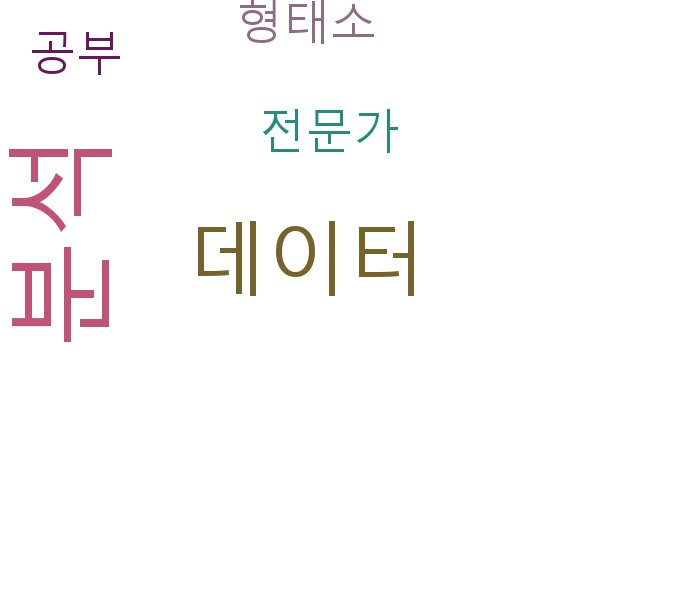

In [16]:
pytagcloud.create_tag_image(word_count_list,
                           'wordcloud.jpg',
                           size=(900,600),
                           fontname='korean',
                           rectangular=False)
Image('wordcloud.jpg')

# 3. 뉴스 크롤링한 데이터 시각화

In [17]:
from konlpy.tag import Kkma
import pickle

## news crawling 가져오기

In [18]:
file = open("news_data.pickle", mode='rb')
crawling_data = pickle.load(file)
print(len(crawling_data))
crawling_data

49


['하태경 "한국당 박찬주 영입? 그래서 지지율 안 오르는 듯"',
 '오신환 "선거법 갈등, \'도농복합형 중대선거구제\'로 파...',
 '가와이 日법무상, 오늘 사임..참의원 부인의 선거법 위...',
 "이인영-나경원-오신환 '3+3회동'..선거제도 논의",
 "'선거법 위반' 황영철, 대법원 선고..의원직 상실 위...",
 '김연철, 현대아산·관광공사 사장과 금강산 문제 협의',
 '통일부 장관, 현대아산·관광공사 사장 만난다.."금강산...',
 '김정은, 금강산 독자개발 의욕.. 정부, 경협 지렛대 ...',
 '김연철 "금강산 개별관광, 남북 협의시 실행방안 찾을 ...',
 '김연철 "금강산 시설 北 일방적 조치 안돼..재산권 보...',
 "'北인권결의안' 유엔총회 제3위원회 제출..日은 불참",
 '북한인권결의안 유엔총회 제3위원회 상정..日 초안작성 ...',
 "유엔, '세계 푸른 하늘의 날', 한국 제안 첫 공식 ...",
 '"미국, 정상간 친부 내세워 연말 넘기려 한다면 망상"...',
 '김영철 "美, 정상간 친분으로 시간끌기..어리석은 망상...',
 '"美하원, 볼턴에 내주 출석요구"..反트럼프 폭탄증언 가세하나',
 "궁지 몰린 트럼프..볼턴 '우크라 의혹' 스모킹건 될까...",
 "트럼프 '우크라 스캔들' 다른 핵심 증언자, 백악관 떠...",
 '美 주러대사 지명자 "트럼프 개인변호사, 우크라 문제 ...',
 '"트럼프-우크라 통화 녹취록서 \'부리스마\' 등 핵심단어...',
 '모친 모신 文대통령, 오늘 靑 복귀한다..장지서 靑으로',
 '문 대통령 모친 강한옥 여사 발인도 조용하게..비공개 ...',
 '어머니 떠나보낸 文대통령 오늘 장례미사..靑 복귀 시점...',
 '文대통령 모친 강한옥 여사 오늘 발인..비공개로 진행',
 '故 강한옥 여사 오늘 영결식..남편 옆자리서 영면',
 '현직 검사 "조국 내사, 임명 전부터 시작된 듯"..의혹 증폭',
 '내일부터 부산서 횡단보도 5m 이내 흡연하면 과태료 2만

## 명사 추출

In [19]:
kkma = Kkma()

ex_nouns = []
for sent in crawling_data:
    for noun in kkma.nouns(sent):
        ex_nouns.append(noun)
        
print(len(ex_nouns))
# ex_nouns

503


## 명사 전처리 : 2음절 이상, 숫자 제외 -> dict

In [20]:
from re import match

In [21]:
nouns_count = {}

for noun in ex_nouns:
    if len(noun) >= 2 and not(match('^[0-9]', noun)):
        nouns_count[noun] = nouns_count.get(noun, 0) + 1
# nouns_count
del nouns_count['오늘']

## 단어 카운트

In [22]:
from collections import Counter

In [23]:
counter = Counter(nouns_count)
top10 = counter.most_common(n=10)
top10

[('트럼프', 6),
 ('대통령', 6),
 ('금강산', 5),
 ('모친', 5),
 ('여사', 4),
 ('한국', 3),
 ('선거법', 3),
 ('경원', 3),
 ('김연철', 3),
 ('연철', 3)]

## word cloud

[{'color': (215, 61, 44), 'size': 137, 'tag': '트럼프'}, {'color': (128, 126, 51), 'size': 137, 'tag': '대통령'}, {'color': (76, 32, 40), 'size': 118, 'tag': '금강산'}, {'color': (141, 45, 129), 'size': 118, 'tag': '모친'}, {'color': (76, 108, 15), 'size': 99, 'tag': '여사'}, {'color': (161, 84, 55), 'size': 80, 'tag': '한국'}, {'color': (99, 29, 148), 'size': 80, 'tag': '선거법'}, {'color': (60, 157, 30), 'size': 80, 'tag': '경원'}, {'color': (134, 208, 161), 'size': 80, 'tag': '김연철'}, {'color': (48, 220, 13), 'size': 80, 'tag': '연철'}]


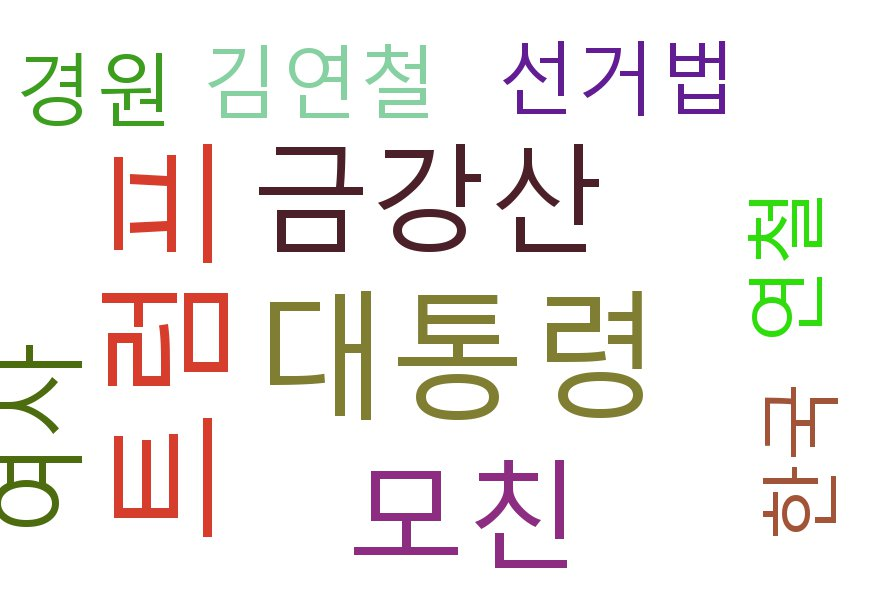

In [24]:
word_count_list = pytagcloud.make_tags(top10, maxsize=80)
print(word_count_list)

pytagcloud.create_tag_image(word_count_list,
                            'newsCrawling.jpg', 
                            size=(900, 600), 
                            fontname='korean', rectangular=False)
Image('newsCrawling.jpg')